# Procesamiento de Lenguaje Natural

Se utilizó el tokenizador de tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [4]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

2025-03-28 01:18:36.649614: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 01:18:36.669071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743146316.691229   74615 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743146316.697423   74615 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 01:18:36.718576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
from wordcloud import WordCloud

In [6]:
import plotly.graph_objects as go
import networkx as nx

In [7]:
from collections import defaultdict

In [8]:
STOPWORDS = set(stopwords.words('english'))

In [9]:
path = "./dataset/"
df = pd.read_csv(path + "df_completo.csv")

## Longitud del Texto

In [10]:
longitud_texto = df["text"].apply(lambda x: len(x.split()))
MAX_LONGITUD = int(np.percentile(longitud_texto, 95))
print(f"Longitud óptima: {MAX_LONGITUD}")

Longitud óptima: 904


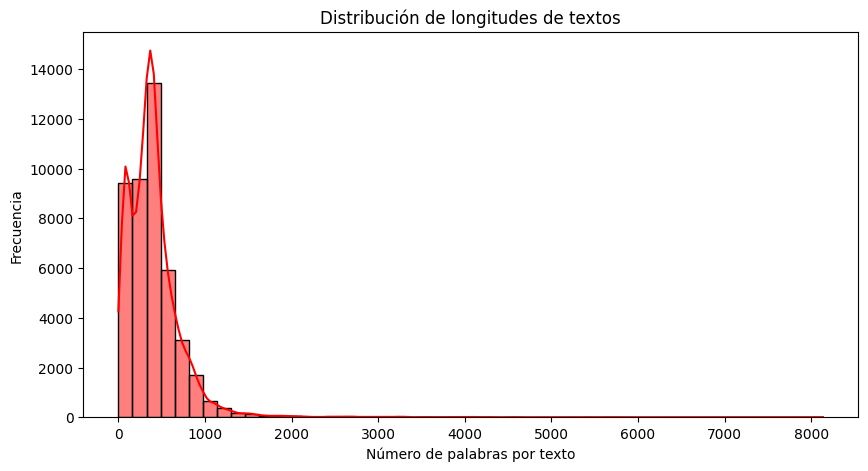

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(longitud_texto, kde=True, bins=50, color="red")
plt.xlabel("Número de palabras por texto")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitudes de textos")
plt.show()

## Limpieza del Texto

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
texto = " ".join(df['text']).lower()

In [14]:
# texto_filtrado = " ".join(p for p in texto.split() if p not in STOPWORDS)
texto_filtrado = " ".join(p for p in texto.split() if p.isalpha() and p not in STOPWORDS)

In [15]:
print(texto_filtrado[:500])

donald trump wish americans happy new year leave give shout haters dishonest fake news former reality show star one job country rapidly grows stronger want wish even dishonest fake news happy healthy new president angry pants great year country rapidly grows stronger want wish even dishonest fake news happy healthy new great year donald trump december tweet went welll kind president sends new year greeting like infantile lack decency even allow rise gutter long enough wish american citizens happ


In [16]:
tokens = text_to_word_sequence(texto_filtrado)

In [17]:
texto_lematizado = [lemmatizer.lemmatize(p) for p in tokens]

In [18]:
print(texto_lematizado[:200])

['donald', 'trump', 'wish', 'american', 'happy', 'new', 'year', 'leave', 'give', 'shout', 'hater', 'dishonest', 'fake', 'news', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'want', 'wish', 'even', 'dishonest', 'fake', 'news', 'happy', 'healthy', 'new', 'president', 'angry', 'pant', 'great', 'year', 'country', 'rapidly', 'grows', 'stronger', 'want', 'wish', 'even', 'dishonest', 'fake', 'news', 'happy', 'healthy', 'new', 'great', 'year', 'donald', 'trump', 'december', 'tweet', 'went', 'welll', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'infantile', 'lack', 'decency', 'even', 'allow', 'rise', 'gutter', 'long', 'enough', 'wish', 'american', 'citizen', 'happy', 'new', 'bishop', 'talbert', 'swan', 'december', 'one', 'like', 'calvin', 'december', 'impeachment', 'would', 'make', 'great', 'year', 'also', 'accept', 'regaining', 'control', 'miranda', 'yaver', 'december', 'hear', 'include', 'many', 'people', 'hate', 'hate', 'al

In [19]:
# Procesamiento particular

texto_fake = " ".join(df[df['label'] == 0]['text']).lower()
texto_true = " ".join(df[df['label'] == 1]['text']).lower()

texto_fake_filtrado = " ".join(p for p in texto_fake.split() if p.isalpha() and p not in STOPWORDS)
texto_true_filtrado = " ".join(p for p in texto_true.split() if p.isalpha() and p not in STOPWORDS)

tokens_fake = text_to_word_sequence(texto_fake_filtrado)
tokens_true = text_to_word_sequence(texto_true_filtrado)

texto_lematizado_fake = [lemmatizer.lemmatize(p) for p in tokens_fake]
texto_lematizado_true = [lemmatizer.lemmatize(p) for p in tokens_true]

## Frecuencia de Palabras

In [20]:
freq_dist = FreqDist(texto_lematizado)

In [21]:
n = 10 # palabras más frecuentes
palabras_comunes = freq_dist.most_common(n)

In [22]:
df_freq = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])

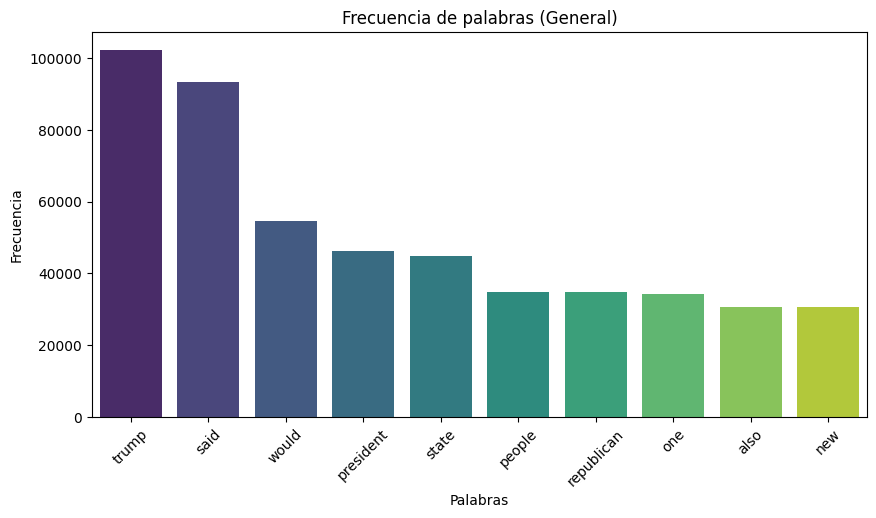

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='Palabra', y='Frecuencia', data=df_freq, palette='viridis', hue='Palabra')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de palabras (General)")
plt.xticks(rotation=45)
plt.show()

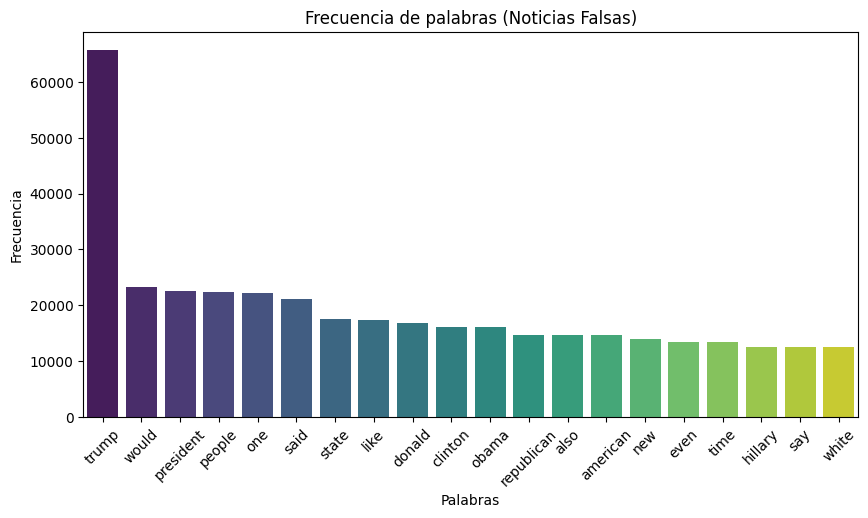

In [24]:
freq_dist_fake = FreqDist(texto_lematizado_fake)
n = 20 # palabras más frecuentes
palabras_comunes_fake = freq_dist_fake.most_common(n)
df_freq_fake = pd.DataFrame(palabras_comunes_fake, columns=['Palabra', 'Frecuencia'])

plt.figure(figsize=(10,5))
sns.barplot(x='Palabra', y='Frecuencia', data=df_freq_fake, palette='viridis', hue='Palabra')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de palabras (Noticias Falsas)")
plt.xticks(rotation=45)
plt.show()

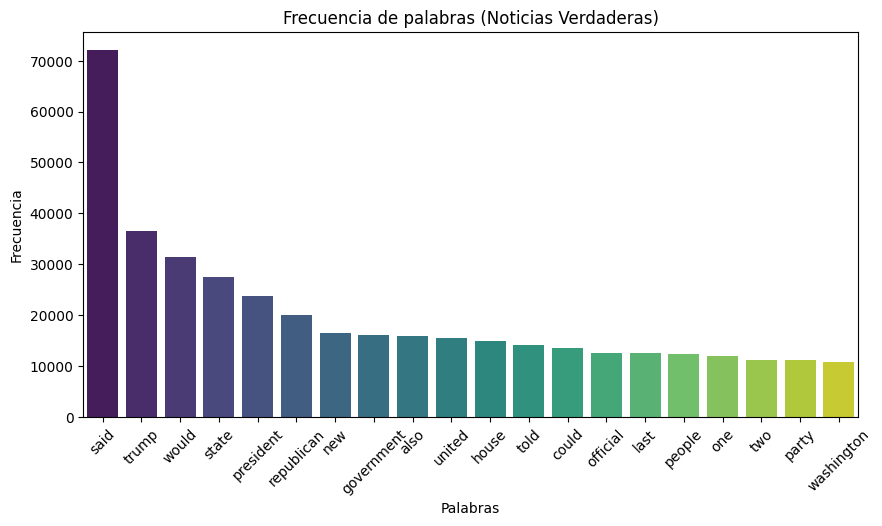

In [25]:
freq_dist_true = FreqDist(texto_lematizado_true)
n = 20 # palabras más frecuentes
palabras_comunes_true = freq_dist_true.most_common(n)
df_freq_true = pd.DataFrame(palabras_comunes_true, columns=['Palabra', 'Frecuencia'])

plt.figure(figsize=(10,5))
sns.barplot(x='Palabra', y='Frecuencia', data=df_freq_true, palette='viridis', hue='Palabra')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de palabras (Noticias Verdaderas)")
plt.xticks(rotation=45)
plt.show()

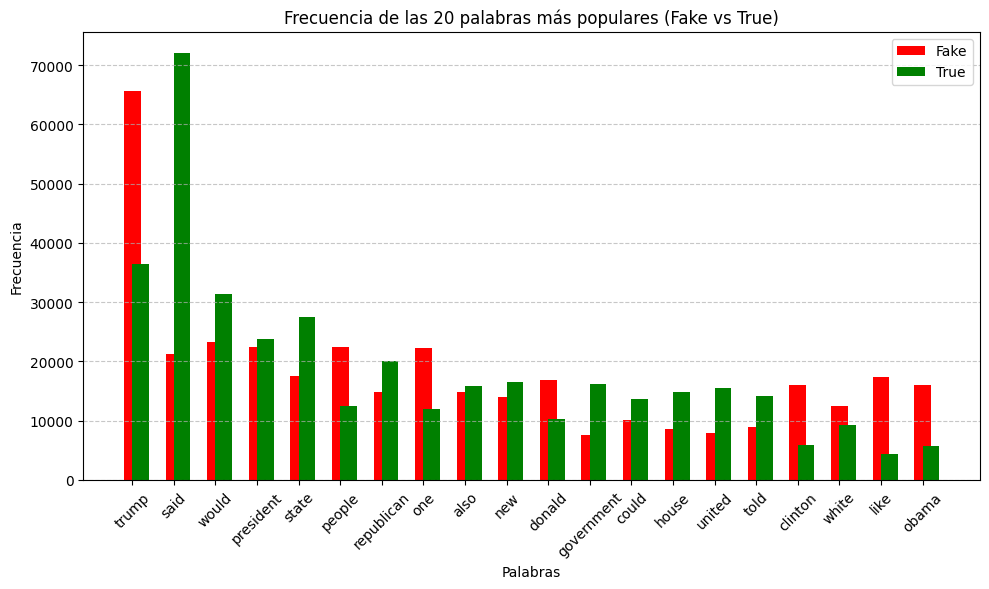

In [26]:
freq_dist_total = freq_dist_fake + freq_dist_true
n = 20
palabras_comunes = freq_dist_total.most_common(n)

fake_counts = [freq_dist_fake[p] for p, _ in palabras_comunes]
true_counts = [freq_dist_true[p] for p, _ in palabras_comunes]
palabras = [p for p, _ in palabras_comunes]
x = range(len(palabras))


fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, fake_counts, width=0.4, label='Fake', color='red', align='center')
ax.bar(x, true_counts, width=0.4, label='True', color='green', align='edge')

ax.set_xlabel('Palabras')
ax.set_ylabel('Frecuencia')
ax.set_title(f'Frecuencia de las {n} palabras más populares (Fake vs True)')
ax.set_xticks(x)
ax.set_xticklabels(palabras, rotation=45)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Word Cloud

In [27]:
word_cloud = WordCloud(background_color='white', colormap='viridis', height=800, width=1200).generate(' '.join(texto_lematizado))

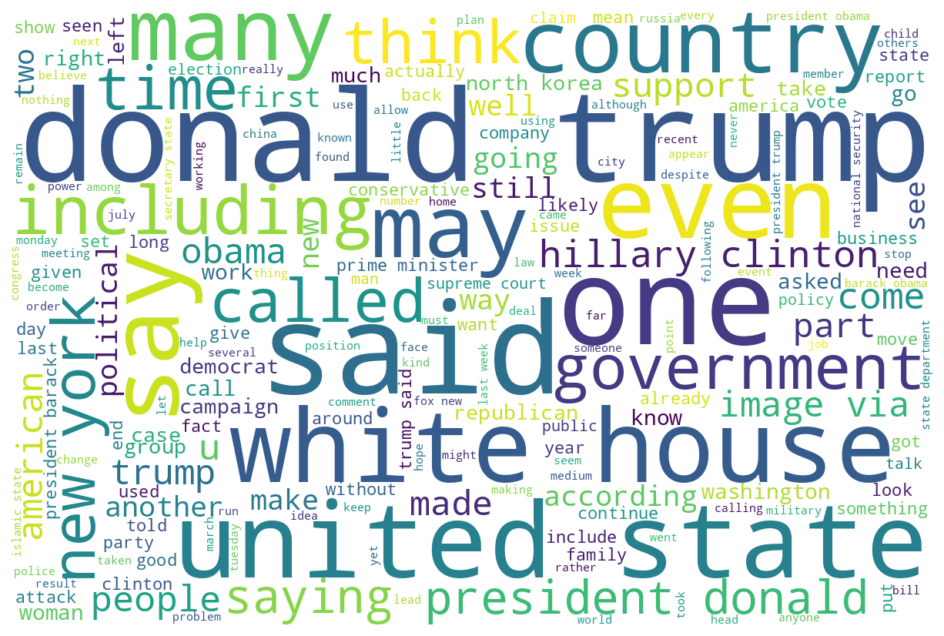

In [28]:
# General
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

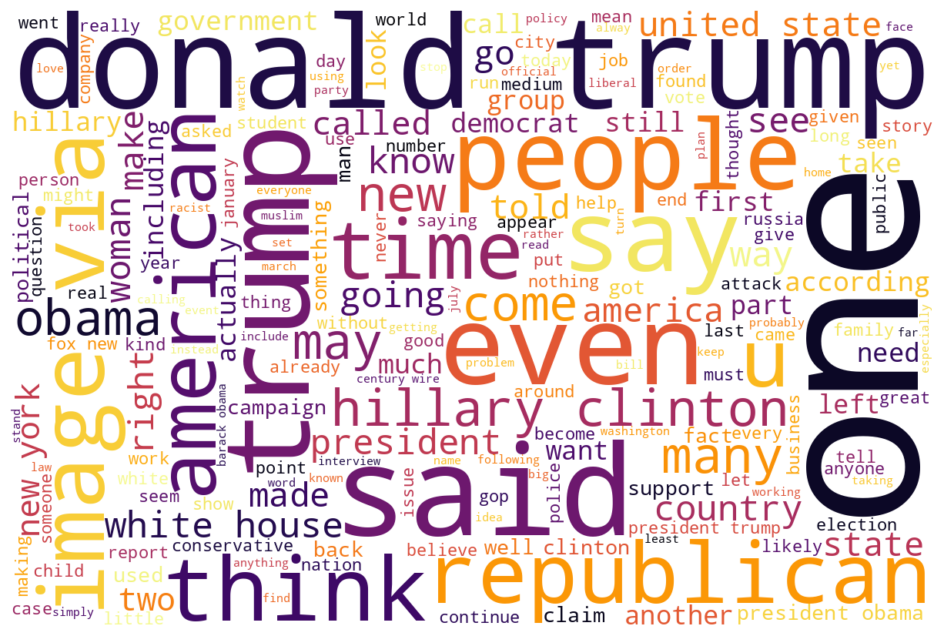

In [29]:
# Fake
word_cloud_fake = WordCloud(background_color='white', colormap='inferno', height=800, width=1200).generate(' '.join(texto_lematizado_fake))
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

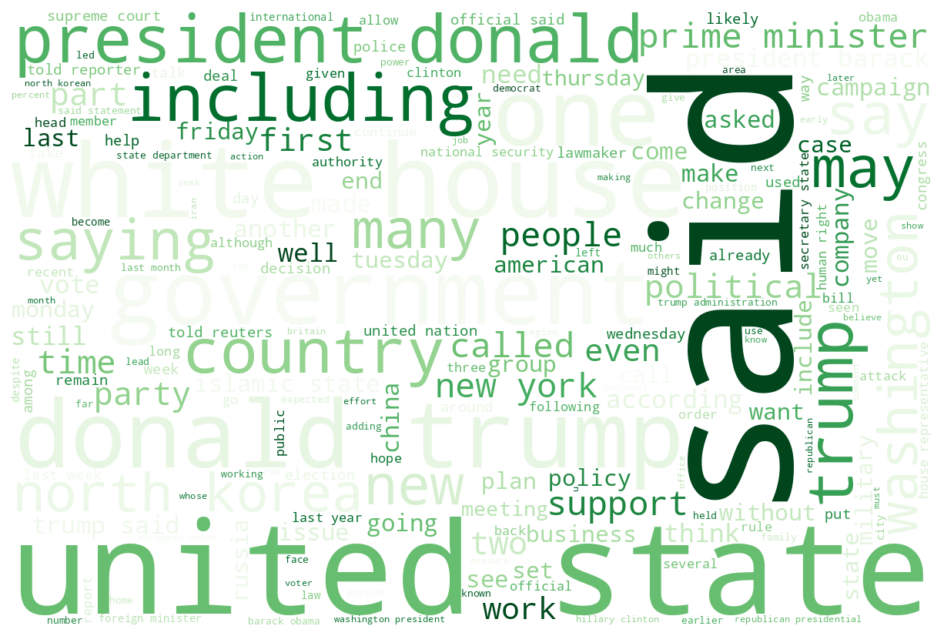

In [30]:
# True
word_cloud_true = WordCloud(background_color='white', colormap='Greens', height=800, width=1200).generate(' '.join(texto_lematizado_true))
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud_true, interpolation='bilinear')
plt.axis("off")
plt.show()

# Gráfica

In [45]:
class GraficaCoOcurrencia:
    def __init__(self, freq_dict, texto_lematizado, n=10, ventana=2):
        self.freq_dict = freq_dict
        self.texto_lematizado = texto_lematizado
        self.n = n
        self.ventana = ventana
        self.G = nx.Graph()
        self.comunes = self.freq_dict.most_common(self.n)
        self.palabras_grafica = set(p for p, _ in self.comunes)
        self.max_frecuencia = max(frecuencia for _, frecuencia in self.comunes)
        
    def _calcular_co_ocurrencia(self):
        co_ocurrencia = defaultdict(int)
        for i, palabra in enumerate(self.texto_lematizado):
            if palabra in self.palabras_grafica:
                ini = max(0, i - self.ventana)
                fin = min(len(self.texto_lematizado), i + self.ventana + 1)
                for j in range(ini, fin):
                    if i != j and self.texto_lematizado[j] in self.palabras_grafica:
                        par = tuple(sorted((palabra, self.texto_lematizado[j])))
                        co_ocurrencia[par] += 1
        return co_ocurrencia
    
    def _crear_grafo(self):
        for (palabra1, palabra2), peso in self._calcular_co_ocurrencia().items():
            self.G.add_edge(palabra1, palabra2, weight=peso)
    
    def _crear_traza_aristas(self):
        edge_x, edge_y = [], []
        
        for edge in self.G.edges():
            x0, y0 = self.G.nodes[edge[0]]['pos']
            x1, y1 = self.G.nodes[edge[1]]['pos']
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            
        return go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=1, color='black'),
            mode='lines',
            hoverinfo='none'
        )
    
    def _crear_traza_nodos(self):
        node_x = []
        node_y = []
        node_text = []
        node_sizes = []
        
        for node in self.G.nodes():
            x, y = self.G.nodes[node]['pos']
            node_x.append(x)
            node_y.append(y)
            conexiones = len(list(self.G.neighbors(node)))
            node_text.append(f'{node}<br>Conexiones: {conexiones}<br>Frecuencia: {self.freq_dict[node]}')
            frecuencia = self.freq_dict.get(node, 1)
            frecuencia = (frecuencia / self.max_frecuencia) * 100
            node_sizes.append(frecuencia)
            
        return go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            text=[node.split('<br>')[0] for node in node_text],  
            textposition='top center',
            hovertext=node_text,
            hoverinfo='text',
            marker=dict(
                showscale=True,
                colorscale='Viridis',
                color=node_sizes,
                size=node_sizes,
                colorbar=dict(
                    thickness=20,
                    title='Frecuencia Relativa',
                    xanchor='left',
                    title_side='right'
                ),
                line_width=1
            )
        )
    
    def generar_grafica(self):
        self._crear_grafo()
        self.pos = nx.spring_layout(self.G, seed=42)
        nx.set_node_attributes(self.G, self.pos, 'pos')
        edge_trace = self._crear_traza_aristas()
        node_trace = self._crear_traza_nodos()
        fig = go.Figure(
            data=[edge_trace, node_trace],
            layout=go.Layout(
                title=f'Gráfica de co-ocurrencia (Top {self.n}, Ventana {self.ventana})',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20, l=5, r=5, t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                width=1000,
                height=800
            )
        )
        return fig
    
    def mostrar_grafica(self):
        fig = self.generar_grafica()
        fig.show()

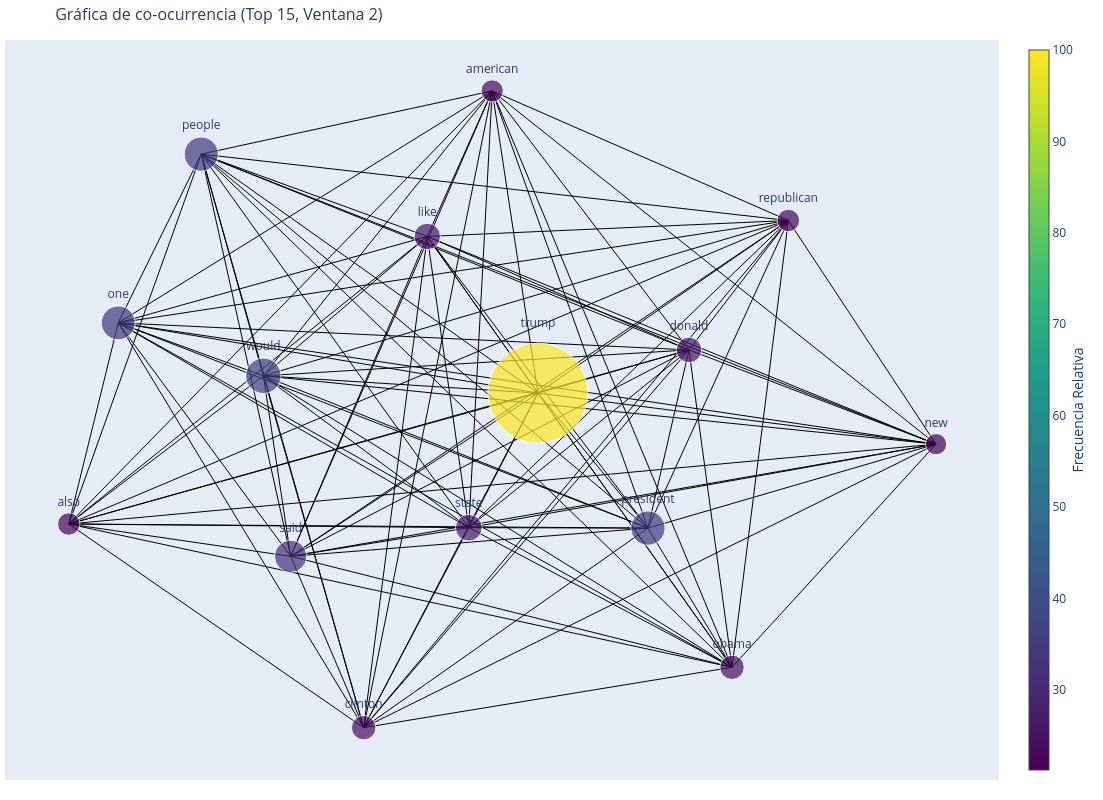

In [46]:
GraficaCoOcurrencia(freq_dist_fake, texto_lematizado_fake, 15).mostrar_grafica()

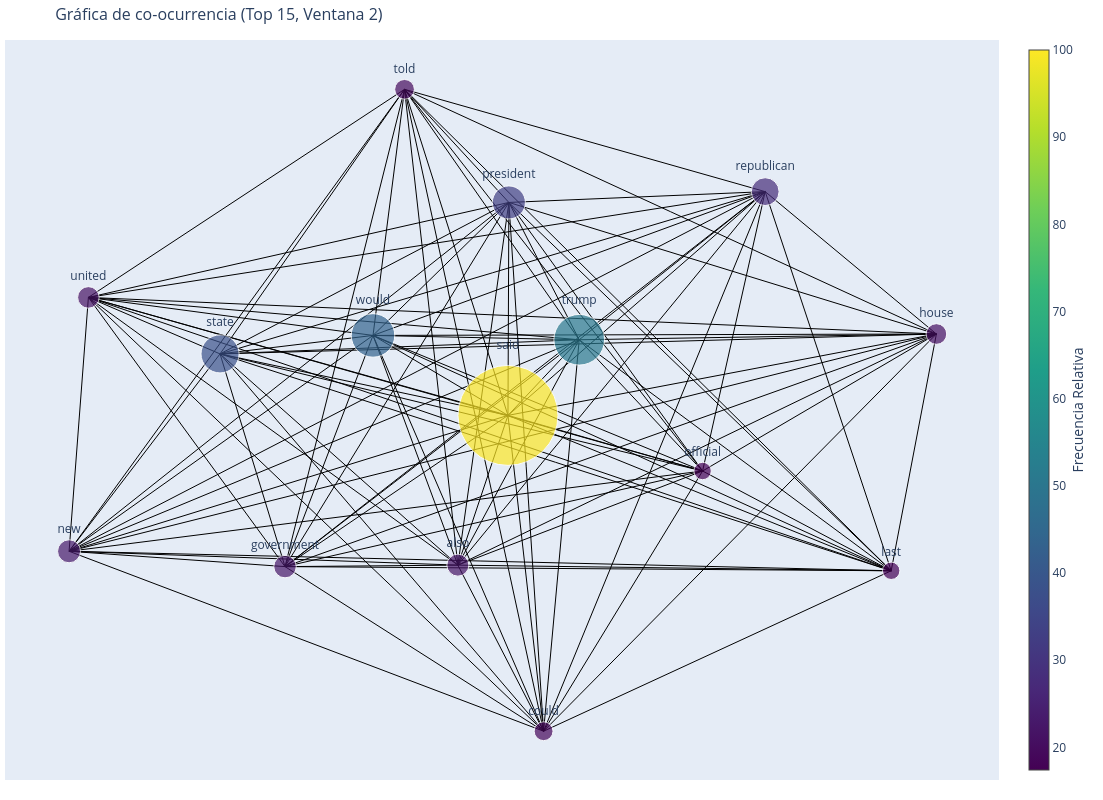

In [47]:
GraficaCoOcurrencia(freq_dist_true, texto_lematizado_true, 15).mostrar_grafica()